##  K Nearest Neighbors

**K Nearest Neighbors (KNN)** is one of the simplest supervised machine learning algorithm mainly used for classification. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.
* It is a non-parametric (it does not make any underlying assumptions about the distribution of data) and lazy learning algorithm (there is no explicit training phase and keeps the training data for prediction).
* Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.
* It can also be used for regression  -  output is the value for the object (continuous value). This value is the average (or median) of the values of its k nearest neighbors.
* Value of k should be selected carefully. Low value may overfit (variance) and High value may underfit (bias).
* Can also do weighted nearest neighbors classification.

<br>
**The algorithm can be summarized as:**

> * The value of k is initialised.
* A new sample is specified.
* We select the k entries in our database which are closest (Euclidean distance) to the new sample.
* We find the most common classification of these entries.
* This is the classification we give to the new sample.

<br>
**Advantages**

> * No assumptions about data .
* Simple algorithm.
* High accuracy(relatively) it is pretty high but not competitive in comparison to better supervised learning models.
* Versatile  -  useful for classification or regression.

<br>
**Disadvantages**

> * Computationally expensive   because the algorithm stores all of the training data.
* High memory requirement.
* Prediction stage might be slow.
* Sensitive to irrelevant features and the scale of the data.

## Use case implementation of K Nearest Neighbors (KNN):

We will build a model to classify whether the person has diabetes or not, based on a set of features like Glucose,  SkinThickness, Insulin, Age, etc.

Let's get started...


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the data
data = pd.read_csv('diabetes.csv')

print(data.shape)

(2000, 9)


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


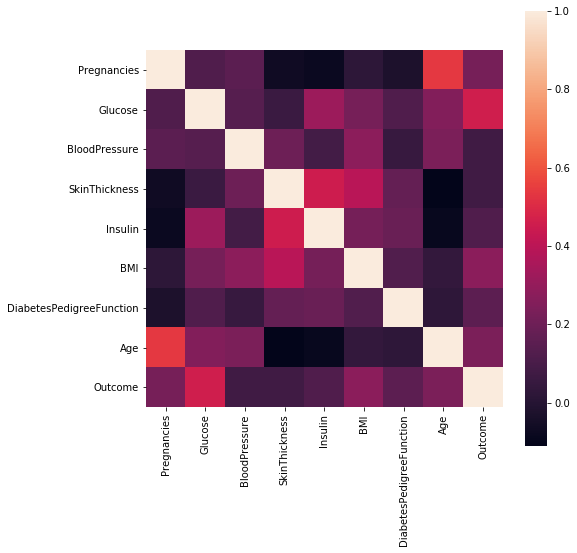

In [4]:
# plot heatmap
plt.figure(figsize=(8, 8))

sns.heatmap(data.corr(), square=True)
plt.show()

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
# split the data into train and test set
from sklearn.model_selection import train_test_split

x = data.iloc[:, :8]
y = data.iloc[:, 8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=46)

print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (1600, 8)
y_train shape: (1600,)
x_test shape: (400, 8)
y_test shape: (400,)


In [7]:
# scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [8]:
# create the model and fit on training data
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

Accuracy: 0.82
             precision    recall  f1-score   support

          0       0.86      0.88      0.87       268
          1       0.74      0.70      0.72       132

avg / total       0.82      0.82      0.82       400

Confusion Matrix:


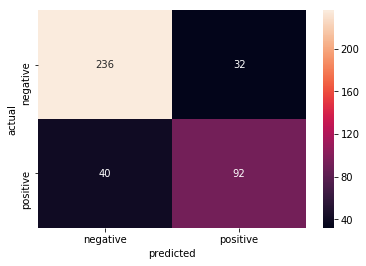

In [9]:
# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))

conf_matrix = pd.DataFrame(confusion_matrix(y_test, predictions),
                           index=['negative', 'positive'],
                           columns=['negative', 'positive'])
# negative=No diabetes & positive=diabetes
print('Confusion Matrix:')
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()